# Advance Tasks - SVC Regression

Try to use a complete new dataset for this Advnace Tasks for SVC regression

In [43]:
# usuasl imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


In [44]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
from sklearn.datasets import load_breast_cancer

In [45]:
# getting the data and load dataset
cancer = load_breast_cancer()

In [46]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Features: The dataset includes 30 numeric features such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.

Target:

0: Malignant

1: Benign

In [47]:
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [48]:
# checking the features and target
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [49]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [50]:
cancer_df.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

Since the data set is clean and the class distribution is relatively balanced, we can use the clean data to do the train-test split and get ready for the model training using different classifiers.

In [51]:
# train-test split

X = cancer_df.drop('target', axis=1)
y = cancer_df.target

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [52]:
# create a pipeline with StandardScaler and SVC
svc_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1, gamma='scale'))


In [53]:
# ft the model to the training data
svc_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=1))])

In [54]:
# Predict on the test data
predictions = svc_model.predict(X_test)

In [55]:
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))
print("\n")

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.98      0.98      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143


Model overall accuracy: 97.20%




Model is already performing quite good with 97.20% still let's try with GridSearchCV approach to see if I can make it better

# GridSearchCV for SVC Optimization

Using rbf Kernels here as it performed best

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True))


In [58]:
# defining parameter range 
param_grid = { 'svc__C': [0.1, 1, 10, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1] }
  
grid = GridSearchCV(pipeline, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ......svc__C=0.1, svc__gamma=0.001;, score=0.686 total time=   0.0s
[CV 2/5] END ......svc__C=0.1, svc__gamma=0.001;, score=0.671 total time=   0.0s
[CV 3/5] END ......svc__C=0.1, svc__gamma=0.001;, score=0.729 total time=   0.0s
[CV 4/5] END ......svc__C=0.1, svc__gamma=0.001;, score=0.659 total time=   0.0s
[CV 5/5] END ......svc__C=0.1, svc__gamma=0.001;, score=0.706 total time=   0.0s
[CV 1/5] END .......svc__C=0.1, svc__gamma=0.01;, score=0.919 total time=   0.0s
[CV 2/5] END .......svc__C=0.1, svc__gamma=0.01;, score=0.929 total time=   0.0s
[CV 3/5] END .......svc__C=0.1, svc__gamma=0.01;, score=0.965 total time=   0.0s
[CV 4/5] END .......svc__C=0.1, svc__gamma=0.01;, score=0.929 total time=   0.0s
[CV 5/5] END .......svc__C=0.1, svc__gamma=0.01;, score=0.941 total time=   0.0s
[CV 1/5] END ........svc__C=0.1, svc__gamma=0.1;, score=0.930 total time=   0.0s
[CV 2/5] END ........svc__C=0.1, svc__gamma=0.1;

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1]},
             verbose=3)

In [59]:
print(grid.best_params_)
print(grid.best_score_)

{'svc__C': 10, 'svc__gamma': 0.001}
0.9741450068399453


In [60]:
# Initializing and training the SVR model
model_gridCV_best = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=10, gamma=0.001, probability=True))
model_gridCV_best.fit(X_train, y_train)

predictions = model_gridCV_best.predict(X_test)

print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))
print("\n")

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.98      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143


Model overall accuracy: 98.60%




<Axes: >

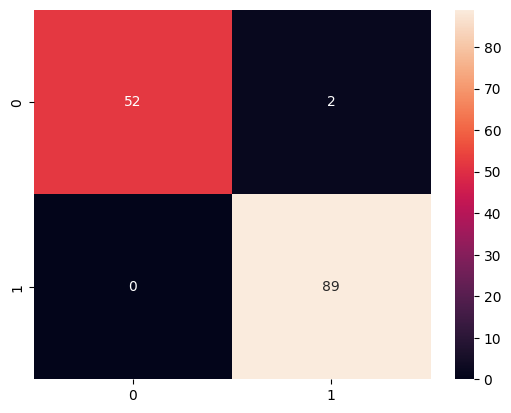

In [61]:
# as usual
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [62]:
roc_auc_score(y_test.values, model_gridCV_best.predict_proba(X_test)[:, 1])

np.float64(0.99812734082397)

# Conclusion
This even perform more better here showing the model accuracy over 98.60% with enhancing accruacy.